## TP RBM

Implementation of a Resctricted Boltzmann Machine. You will need to code the following functions
  * **sigmoid** : return the sigmoid function
  * **SampleHiddens** : given a RBM (weight matrix and local biases), and a set of visible configuration, return new samples for the hidden nodes according to $p(\vec{\sigma}|\vec{s})$
  * **SampleVisibles** : given a RBM (weight matrix and local biases), and a set of hidden configuration, return new samples for the visible nodes according to $p(\vec{s}|\vec{\sigma})$
  * **Sampling** : given a RBM and a set of visible configurations, return a set of samples after t steps. It will be important to return the set of visible/hidden configuration AND the magnetisations
  * **updateWeights** : update the weight matrix and the biases

In [85]:
# Loading artificial dataset !
X = np.genfromtxt('art4clus.d')

In [87]:
u,s,v = np.linalg.svd(X/X.shape[1]**0.5)
Xsc = np.matmul(X.T,u)

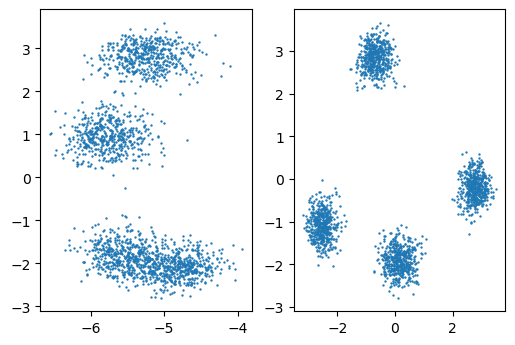

In [88]:
f,ax = plt.subplots(1,2,dpi=100)
ax[0].scatter(Xsc[:,0],Xsc[:,1],s=0.5)
ax[1].scatter(Xsc[:,2],Xsc[:,3],s=0.5)

In [47]:
def sigmoid(x):
    # TODO

In [139]:
# X is Nv X M
# W is Nh x Nv
def SampleHiddens(X,W,b):
    # TODO

In [140]:
# H is Nh X M
# W is Nh x Nv
def SampleVisibles(H,W,a):
    # TODO

In [151]:
def Sampling(X,W,a,b,it_max=10):
    # TODO

In [16]:
def updateWeights(v_pos,h_pos,v_neg,h_neg,W,a,b,lr):
    #TODO

In [124]:
def fit_batch(X,Xchain,W,a,b,lr):
    _, h_pos = SampleHiddens(X,W,b)
    X_chain,_,h_neg,_ = Sampling(Xchain,W,a,b)
    updateWeights(X,h_pos,Xchain,h_neg,W,a,b,lr)
    return Xchain

In [157]:
# implement batches
def getMiniBatches(X,m,bs):
    return X[:,m*bs:(m+1)*bs]

The cell below run the training of the RBM

In [260]:
# init
Nv = X.shape[0]
Nh = 50
bs = 25
NB = int(X.shape[1]/bs)
W = np.random.normal(0,1e-4,size=(Nh,Nv))
a = np.zeros(Nv)
b = np.zeros(Nh)
Xchain = np.random.random((Nv,bs))
lr = 0.01
t_max = 50

for t in range(t_max):
    print(t)
    for m in range(NB):
        Xb = getMiniBatches(X,m,bs)
        Xchain = fit_batch(Xb,Xchain,W,a,b,lr)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


Test your machine : 

  * you can first look at the permanent chain: project it along the correct direction and use a scatter plot to see if it is similar to the dataset
  * you can sample new configurations using MCMC

In [ ]:
# MNIST

import pickle
import gzip
import numpy as np
import matplotlib.pyplot as pp

f = gzip.open('../../M1Pro-ML/mnist.pkl.gz', 'rb')
u = pickle._Unpickler(f)
u.encoding = 'latin1'
p = u.load()
train_set, _, _ = p

X = train_set[0][:10000,:].T